<a href="https://colab.research.google.com/github/jarmstrong22/AI/blob/main/HW7/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Import all the necessary libraries

In [20]:
# Mount on googe drive to access needed file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# Read csv located at "path"
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/nasa_asteroid.csv')

In [22]:
# Print dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

Here I decide at my own discretion which variables should stay and which should go. Without knowing any trends associated to any, I pick to remove ones that includes things that seemingly would not have an effect on if the asteroid is hazardous or not.

In [23]:
# Select features and target variable
X = df.drop(columns=['Neo Reference ID', 'Name', 'Close Approach Date', 'Orbiting Body', 'Orbit Determination Date', 'Equinox', 'Hazardous'])
y = df['Hazardous']


I choose to remove variables related to names/Ids, dates, or categories that do not relate to hazardness.

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state=444)

#  Split the training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=444)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)


Split the data into training, test, and validation sets to be used to train and test my model

---

Also in the code above is a scaling of the numerical predicting variables used in the analysis in order to standardize the figures used

In [25]:
# Initialize and train the MLPClassifier
mlp_clf = MLPClassifier(hidden_layer=(100, 50), max_iter=1000, random_state=444) # Create MLP classifier with 100 neurons and 50 neurons in the second layer
mlp_clf.fit(X_train_scaled, y_train)

# Calculate all the accuracies
train_accuracy = mlp_clf.score(X_train_scaled, y_train)
val_accuracy = mlp_clf.score(X_val_scaled, y_val)
test_accuracy = mlp_clf.score(X_test_scaled, y_test)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Validation Accuracy: 0.9725609756097561
Test Accuracy: 0.9751243781094527


Before attempting the test with different varibles I try with the first layer having 100 neurons and the second having 50 neurons. This has great success, but I am going to try more options and test with various sizes of each layer

In [28]:
hyperparameters = [
    {'hidden_layer': (150, 100)}, # Two hidden layers with 150 neurons in the first and 100 in the second
    {'hidden_layer': (200, 100)}, # Two hidden layers with 200 neurons in the first and 100 in the second
    {'hidden_layer': (50, 500)}, # Two hidden layers with 50 neurons in the first and 500 in the second
    {'hidden_layer': (120, 200)}, # Two hidden layers with 120 neurons in the first and 200 in the second
]

In [29]:
results = []
for params in hyperparameters:
    model = MLPClassifier(max_iter=1000, random_state=444, **params)
    model.fit(X_train_scaled, y_train)
    # Calculate accuracies
    train_accuracy = model.score(X_train_scaled, y_train)
    val_accuracy = model.score(X_val_scaled, y_val)

    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'params': params, 'test accuracy': accuracy,
                    'train accuracy': train_accuracy,
                    'val accuracy': val_accuracy})

# Summarize the results in a table
results_df = pd.DataFrame(results)
print('Hyperparameter tuning results:')
print(results_df)

Hyperparameter tuning results:
                               params  test accuracy  train accuracy  \
0  {'hidden_layer_sizes': (150, 100)}       0.977257             1.0   
1  {'hidden_layer_sizes': (200, 100)}       0.980100             1.0   
2   {'hidden_layer_sizes': (50, 500)}       0.984364             1.0   
3  {'hidden_layer_sizes': (120, 200)}       0.977967             1.0   

   val accuracy  
0      0.966463  
1      0.966463  
2      0.972561  
3      0.975610  


After testing 5 different combinations, all gave similar results but 120 neurons in the first hidden layer and 100 neurons in the second layer. Since this is marginally better I am going to go with that combination to train my test set

In [31]:
mlp = MLPClassifier(hidden_layer=(150,100), max_iter=500, random_state=44)

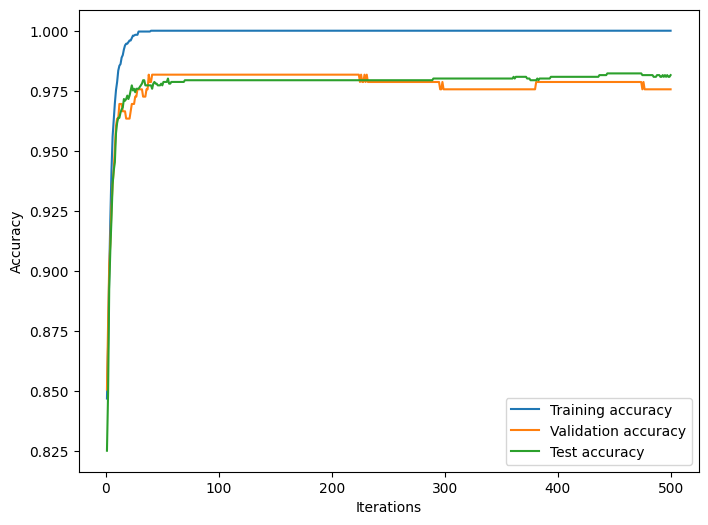

In [32]:
# Initialize lists to store training, validation, and test accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Train the classifier and calculate accuracies at each iteration
# partial_fit() allows for incremental learning without retraining it from scratch
for i in range(500):
    mlp.partial_fit(X_train_scaled, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train_scaled, y_train))
    val_accuracies.append(mlp.score(X_val_scaled, y_val))
    test_accuracies.append(mlp.score(X_test_scaled, y_test))

# Plot the training, validation, and test accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, 501), train_accuracies, label='Training accuracy')
plt.plot(range(1, 501), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 501), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

As the iterations, epochs, increase the accuracy increases in each the training, validation, and test set. This is expected, although as it increases, the spread between the training set and others increases. A possible solution to fix the suspected overfitting of the training set is to try different combinations where the training set accuracy is not 1.0.
But for my test, I am going to go with the best that I currently have.

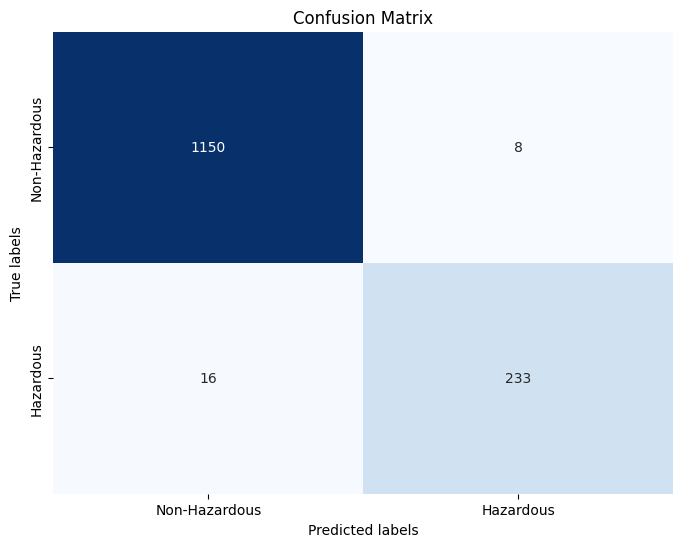

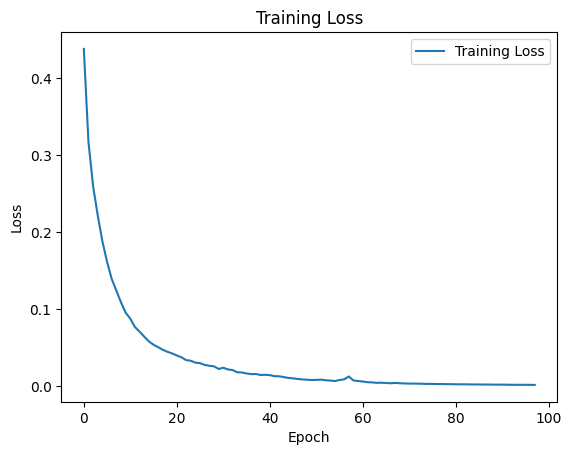

   Hidden Layers  Neurons per Layer  Accuracy
0              1                100  0.982232
1              2                 50  0.980100
2              3                100  0.975124
3              2                100  0.982942


In [35]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Non-Hazardous', 'Hazardous'],
                yticklabels=['Non-Hazardous', 'Hazardous'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Plot loss curve
def plot_loss(history):
    plt.plot(history.loss_curve_, label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    #Displaying the loss curve

# Confusion matrix
plot_confusion_matrix(y_test, y_pred)

# Plot loss curve
plot_loss(mlp_clf)

# Experiment with different hyperparameters
hyperparameters = [
    (1, 100),  # One hidden layer with 100 neurons
    (2, 50),   # Two hidden layers with 50 neurons each
    (3, 100),  # Three hidden layers with 100 neurons each
    (2, 100),  # Two hidden layers with 100 neurons each
]

results = []
for layers, neurons in hyperparameters:
    mlp_clf = MLPClassifier(hidden_layer=tuple(neurons for _ in range(layers)), max_iter=1000, random_state=42)
    mlp_clf.fit(X_train_scaled, y_train)
    y_pred = mlp_clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((layers, neurons, accuracy))

# Summarize results in a table
results_df = pd.DataFrame(results, columns=['Hidden Layers', 'Neurons per Layer', 'Accuracy'])
print(results_df)


My confusion matrix tells us that 1150(non-hazardous) + 233(hazardous) cases were classified correctly and 8 + 16, nonhazardous and hazardous respectively were classified incorrectly
In the loss curve we see that as the epochs, the amount of times the data is passed through, decrease towards gradient zero.

Summary
The great test accuracy acquired confirms that the predictors I chose to drop were not pivital in predicting if the asteroid is hazardous or not. Next, I trained the model with 2 hidden layers with 50 and 100 neurons over 1000 iterations.
Following that discovery, I tweaked the combinations of neurons in the hidden layer to find a more accurate model. This was not very successful, although I found a more accurate model, it was only marginally better. Therefore there is no telling if this is a better predictor or if it just predicts better based on the data set given.